# School Census Analysis

The dataset I used is from the American Statistical 
Association’s [U.S. Census at School](https://ww2.amstat.org/censusatschool/) project and consists 
of a wide array of questions answered by American school 
students from all states and most grades. A 500-record dataset
has been sampled and downloaded from this project and presented 
as an Excel file at http://bit.ly/2VuOA98

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Raw Data

In [2]:
df = pd.read_excel("http://bit.ly/2VuOA98")
dfhours = df[['Sleep_Hours_Schoolnight', 'Doing_Homework_Hours']]
dfhours.columns = ['sleep', 'homework']
dfhours.sleep = pd.to_numeric(dfhours.sleep, errors='coerce')
dfhours.homework = pd.to_numeric(dfhours.homework, errors='coerce')
dfhours = dfhours.dropna()
dfhours['hpd'] = round((dfhours.homework/5),2)
##dfhours

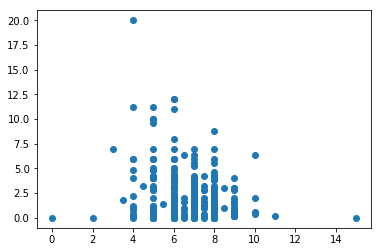

In [3]:
plt.scatter(dfhours.sleep, dfhours.hpd)
plt.show()

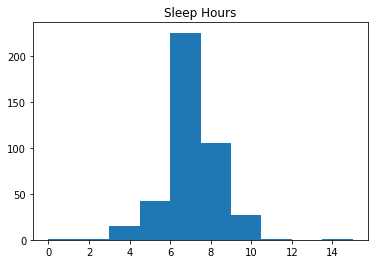

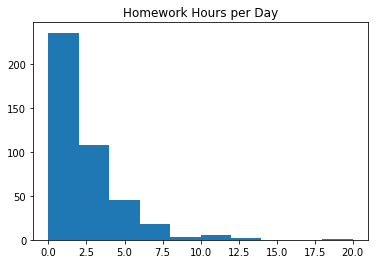

In [4]:
plt.hist(dfhours.sleep)
plt.title('Sleep Hours')
plt.show()
plt.hist(dfhours.hpd)
plt.title('Homework Hours per Day')
plt.show()

## Processed Data

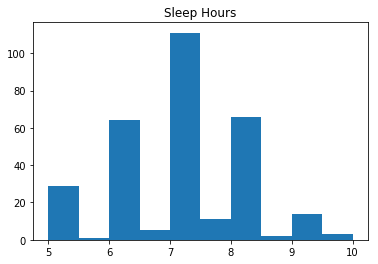

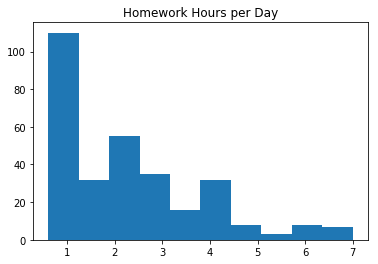

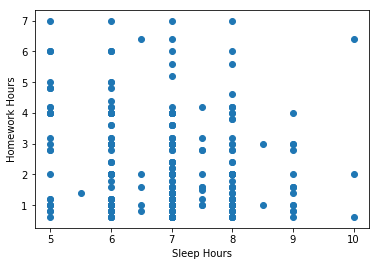

,sleep,hpd
sleep,1.00000,-0.20699
hpd,-0.20699,1.00000


In [7]:
dfhours = dfhours[dfhours.sleep <= 12]
dfhours = dfhours[dfhours.sleep >= 5]
dfhours = dfhours[dfhours.hpd <= 7.5]
dfhours = dfhours[dfhours.hpd >= 0.5]
plt.hist(dfhours.sleep)
plt.title('Sleep Hours')
plt.show()
plt.hist(dfhours.hpd)
plt.title('Homework Hours per Day')
plt.show()
plt.scatter(dfhours.sleep, dfhours.hpd)
plt.xlabel('Sleep Hours')
plt.ylabel('Homework Hours')
plt.show()
dfhours2 = dfhours[['sleep', 'hpd']]
dfhours2.corr()

## Results

This processing showed no correlation between the number of hours students spend on homework each day and the number of hours they sleep on week days.

To process the data I first filtered made all the non numeric entries into "NaN" types, then filtered them out. I then took the contents of the "Homework Hours" column and made a new column that divided those values by 5, to represent how many hours per day the students spend on homework. At this point there were 418 data sets left. I graphed this data in both scatter and histogram form.

Based on the graphs, I decided that the outliers to get rid of for hours of sleep were those less than 5 hours or greater than 12, and that for homework hours per day to get rid of less than half an hour and greater than 7.5 hours. The value for correlation is -.20699, suguesting little to no correlation, as supported by the graphs. After all this filtering there were only 306 data pieces left.